# Planting a Winery: Comparing California Wine Countries

We are interested in opening a winery in California, and we compared Napa Valley and San Diego to make the most profitable decision. We reviewed data from the Yelp API to guide our decision. We used API requests to gather the data, then parsed and cleaned the data to collect the most relevant data for analysis. After reviewing our statistical analysis and comparing data between the regions, we decided that San Diego would be the better area.

# Business Problem

We want to open a winery, and we know that Napa Valley is one of the best-known locations for wineries. We also want to investigate a lesser-known region for other opportunities. We chose San Diego as it is in southern California, away from Napa Valley to the north.

***
We needed to consider:
- **Q1: What do the regions look like statistically?**
  - Are there any strong relationships between the statistics?
  - Are there any clusters of businesses in each area?
  
  
- **Q2: What are the price
ranges for each area?**
    - Lower prices may be more broadly appealing
    - Higher pricing targets more discerning, luxury clientele
        
        
- **Q3: Ratings**
 - How satisfied are the customers in each area?
   - Unsatisfied customers indicate oportunities to steal their business from the other wineries
 - Are there more satisfied customers in one region vs. the other?
 
 
- **Q4: Number of reviews**
 - May indicate the popularity of businesses
   - More popular businesses may have more reviews
 - Larger review counts may indicate larger volumes of visitors to the area

# Exploring, Analyzing, and Interpreting Results

In our previous notebook(`NOTEBOOK NAME`), we collected data from the Yelp API for our two regions of interest, Napa Valley and San Diego. We used that data to gain insight into our markets. 

Some of the data represented includes:
- The average rating per business
- Total number of reviews per business
- Pricing per business 
- The location for each business

# Importing Packages

In [2]:
# Accessing stored data
import csv
import json

# Data exploration and statistics
import pandas as pd
import numpy as np

# Creating Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

## San Diego Wineries

In [3]:
# Read in data from the San Diego .csv
df_sd_details = pd.read_csv("data/wineries_San_Diego_price_converted.csv")
df_sd_details.reset_index(drop=True, inplace=True)
df_sd_details['City'] = 'San Diego'

## Napa Valley Wineries

In [4]:
# Read in data from the Napa Valley .csv
df_nv_details = pd.read_csv("data/wineries_Napa Valley_price_converted.csv")
df_nv_details.reset_index(drop=True, inplace=True)
df_nv_details['City'] = 'Napa Valley'

## Combined Data for Both Regions

In [5]:
# Concatenating the two dataframes into one
combined = pd.concat([df_sd_details, df_nv_details], ignore_index = 0)
combined

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,City,price_converted
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,San Diego,2
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,San Diego,2
2,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,San Diego,2
3,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,San Diego,2
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,San Diego,2
...,...,...,...,...,...,...,...,...,...,...,...,...
398,Andretti Winery,"1625 Trancas St Ste 3017 Napa, CA 94558",NKCMqIlRopcSMA15JpeyJg,wineries,Wineries,3.5,311,$$,38.321516,-122.304108,Napa Valley,2
399,Lionstone International,"21481 8th St E Sonoma, CA 95476",pW9QPUkm2_tTXLCzyQ6qvg,wineries,Wineries,1.0,1,$$,38.262062,-122.442036,Napa Valley,2
400,Napa Vinyards,"Napa, CA 94558",UwgQWRkTzlFnw3-QYCaBlQ,wineries,Wineries,1.0,1,$$,38.383260,-122.313060,Napa Valley,2
401,Cook Vinyard Management,"19626 Eighth St E Sonoma, CA 95476",LxMkyxBokxu6iRIsuMF5Tw,wineries,Wineries,1.0,1,$$,38.286261,-122.434893,Napa Valley,2


# Data Exploration

In [6]:
# Overview of data types and column names
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 402
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             485 non-null    object 
 1   location         485 non-null    object 
 2   Business ID      485 non-null    object 
 3   alias            485 non-null    object 
 4   title            485 non-null    object 
 5   rating           485 non-null    float64
 6   review_count     485 non-null    int64  
 7   price            485 non-null    object 
 8   latitude         485 non-null    float64
 9   longitude        485 non-null    float64
 10  City             485 non-null    object 
 11  price_converted  485 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 49.3+ KB


In [15]:
# Generating statistics for our integers and floats
combined.describe()

,rating,review_count,latitude,longitude,price_converted
count,485.000000,485.000000,485.000000,485.000000,485.000000
mean,4.551546,81.723711,37.415949,-121.434665,2.179381
std,0.679863,183.315341,2.029642,1.998159,0.492493
min,1.000000,1.000000,32.512608,-122.494690,1.000000
25%,4.500000,4.000000,38.247393,-122.371093,2.000000
50%,4.500000,15.000000,38.297370,-122.295921,2.000000
75%,5.000000,79.000000,38.363850,-122.253380,2.000000
max,5.000000,2239.000000,38.465419,-116.750704,4.000000


In [34]:
# Concentrating statistical overview and comparing between cities
combined.groupby('City')[['rating','review_count','price_converted']].describe().T

City                   Napa Valley   San Diego
rating          count   403.000000   82.000000
                mean      4.555831    4.530488
                std       0.696462    0.594977
                min       1.000000    1.000000
                25%       4.500000    4.500000
                50%       5.000000    4.500000
                75%       5.000000    5.000000
                max       5.000000    5.000000
review_count    count   403.000000   82.000000
                mean     85.382134   63.743902
                std     195.580404  102.770367
                min       1.000000    1.000000
                25%       3.000000    7.000000
                50%      14.000000   26.000000
                75%      73.500000   93.500000
                max    2239.000000  626.000000
price_converted count   403.000000   82.000000
                mean      2.220844    1.975610
                std       0.521538    0.220863
                min       1.000000    1.000000
                25%       2.000000    2.000000
                50%       2.000000    2.000000
                75%       2.000000    2.000000
                max       4.000000    3.000000

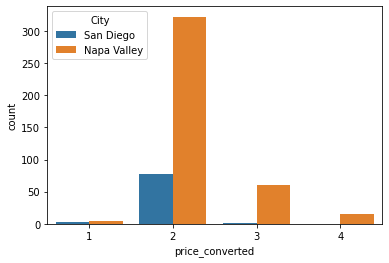

In [13]:
# Comparing business pricing between regions
sns.countplot(data=combined, hue='City', x='price_converted' );

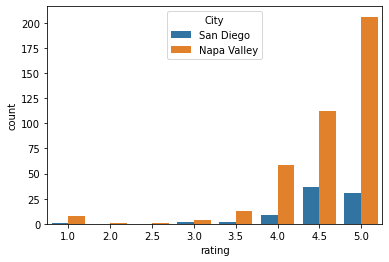

In [14]:
# Total ratings for each region
sns.countplot(data=combined, hue='City', x='rating' );

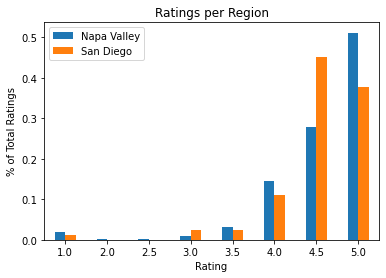

In [27]:
# Making a grouped bar chart for each city after normalizing the ratings
norm_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame()
norm_rating.unstack(0).plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xticks(rotation = 0)
plt.xlabel('Rating')
plt.ylabel('% of Total Ratings')
plt.title('Ratings per Region');

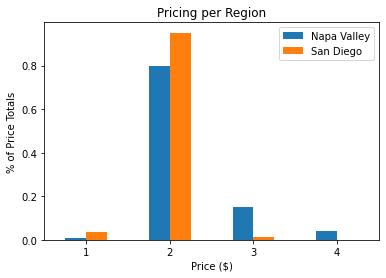

In [26]:
# Making a grouped bar chart for each city after normalizing the prices
norm_pricing = combined.groupby('City')['price_converted'].value_counts(normalize=True).to_frame().unstack(0, fill_value=0)
norm_pricing.plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xlabel('Price ($)')
plt.xticks(rotation = 0)
plt.ylabel('% of Price Totals')
plt.title('Pricing per Region');

In [45]:
# Creating geospatial view of Napa Valley Wineries

# Using Mapbox's API for geographical information
with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

# Setting the dataframe to be visualized
df_nv = combined[combined['City'] == 'Napa Valley']

# Creating the map
fig = px.scatter_mapbox(df_nv, lat= "latitude", lon= "longitude", 
                        color= "price_converted", range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ",
                                 "latitude":"Latitude ",
                                 "longitude":"Longitude ",
                                 'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_nv["name"],
                        color_continuous_scale=px.colors.sequential.Greys,
                        size_max=15, zoom=8.75, title='Napa Valley Wineries',
                        mapbox_style='light', width=600, height=500)
fig.show()

In [48]:
# Creating geospatial view of San Diego Wineries

with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

df_sd = combined[combined['City'] == 'San Diego']

fig = px.scatter_mapbox(df_sd, lat= "latitude", lon= "longitude",
                        color= "price_converted", range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ", 
                                "latitude":"Latitude ","longitude":"Longitude ",
                                'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_sd["name"],
                        color_continuous_scale=px.colors.sequential.Greys,
                        size_max=15, zoom=8.5, title='San Diego Wineries',
                        mapbox_style='light', width=600, height=500)
fig.show()